In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns
sns.set_style('ticks')

In [68]:
df = pd.DataFrame()
df['x'] = np.load('x.npy')
df['95centile'] = np.load('q95.npy')

In [74]:
def f(x, a, b, c, d):
    return d / (a * x + b)**c

In [75]:
popt, _ = curve_fit(f, df['x'].iloc[:500], df['95centile'].iloc[:500])

In [76]:
df['95centile_fit'] = f(df['x'], *popt)

In [77]:
popt

array([7.74016357, 0.31247854, 0.62034501, 0.50598409])

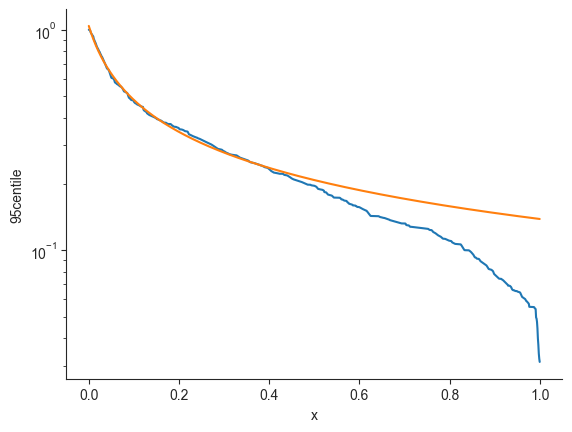

In [73]:
fig, ax = plt.subplots()
sns.lineplot(df, x='x', y='95centile', ax=ax)
sns.lineplot(df, x='x', y='95centile_fit', ax=ax)
sns.despine(ax=ax)
ax.set_yscale('log')